# 2021-1C TP FIUFIP: Que No Se Escape Nadie

## Consideraciones iniciales

Inicialmente se clasificaron a las variables en influyentes o no, segun consideraciones a priori

#### Influye en altos o bajos ingresos

- años estudiados
- categoria de trabajo
- edad (Ya sea por experiencia o falta de estudio)
- estado marital
- horas_de_trabajo_registradas
- trabajo

#### No deberia influir

- Genero
- Barrio
- Religion

#### Primeras observaciones

Ademas de anotarse observaciones interesantes

- Barrio mas del 90% es de Palermo
- Anios estudiados es un mapa de educacion alcanzada
- ganancia_perdida_declarada_bolsa_argentina el 87% es cero
- El 85% le gusta Jesus
- Probablemente rol_familiar y estado_marital esten relacionadas


## Feature Engineering

In [5]:
from pandas_profiling import ProfileReport

report = ProfileReport(df, title='superhéroes', minimal=True)
report

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Analisis de las consideraciones iniciales

In [3]:
import pandas as pd

In [4]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'

df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_GID), skiprows=0)

#### años_estudiados

In [23]:
df[(df['anios_estudiados'] == 15) & (df['tiene_alto_valor_adquisitivo'] == 1)]

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
14,15,NaN,relacion_de_dependencia,40,universidad_1_anio,matrimonio_civil,0,hombre,40,budismo,casado,1,reparador
117,15,Palermo,empleado_municipal,49,universidad_1_anio,matrimonio_civil,0,hombre,40,judaismo,casado,1,reparador
143,15,Palermo,relacion_de_dependencia,45,universidad_1_anio,sin_matrimonio,-1564,mujer,40,cristianismo,sin_familia,1,profesional_especializado
341,15,Palermo,relacion_de_dependencia,38,universidad_1_anio,matrimonio_civil,7298,hombre,40,cristianismo,casado,1,reparador
357,15,Palermo,relacion_de_dependencia,40,universidad_1_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,soporte_tecnico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31986,15,Palermo,relacion_de_dependencia,45,universidad_1_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,profesional_especializado
32063,15,Palermo,relacion_de_dependencia,30,universidad_1_anio,matrimonio_civil,7298,mujer,16,cristianismo,con_hijos,1,profesional_especializado
32077,15,Palermo,relacion_de_dependencia,32,universidad_1_anio,matrimonio_civil,0,hombre,60,cristianismo,casado,1,otros
32228,15,Palermo,relacion_de_dependencia,40,universidad_1_anio,matrimonio_civil,7688,hombre,44,cristianismo,casado,1,directivo_gerente


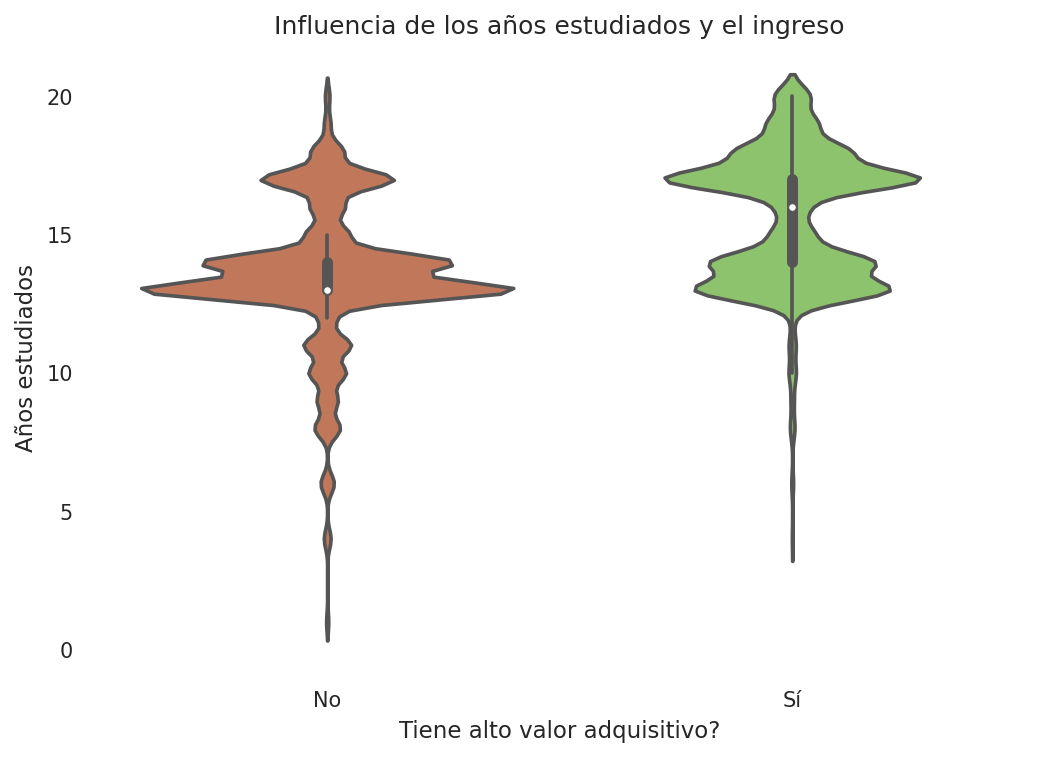

In [149]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns


plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.violinplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

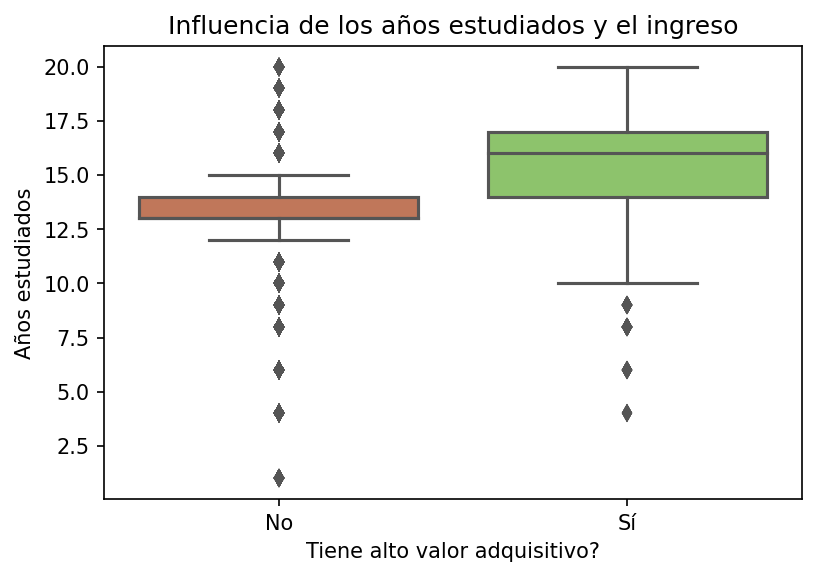

In [31]:
plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

In [32]:
df['anios_estudiados'].value_counts()

13    10501
14     7291
17     5355
18     1723
15     1382
11     1175
16     1067
10      933
8       646
19      576
9       514
12      433
20      413
6       333
4       168
1        51
Name: anios_estudiados, dtype: int64

In [134]:
import numpy as np
def f(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n < acum


l = [f(x, 0) for x in df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].isna().to_numpy()]

df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].reset_index()[l].set_index('index')


,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
index,,,,,,,,,,,,,
5361,10,Palermo,sin_trabajo,18,1_anio,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,0,NaN
10845,8,Palermo,sin_trabajo,23,7-8_grado,divorciado,0,hombre,35,cristianismo,sin_familia,0,NaN
14772,10,Palermo,sin_trabajo,17,1_anio,sin_matrimonio,0,hombre,30,cristianismo,con_hijos,0,NaN
20337,11,Palermo,sin_trabajo,18,2_anio,sin_matrimonio,0,mujer,10,cristianismo,con_hijos,0,NaN
23232,14,Palermo,sin_trabajo,20,5_anio,sin_matrimonio,0,hombre,40,judaismo,con_hijos,0,NaN
32304,13,Palermo,sin_trabajo,30,4_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,NaN
32314,14,Palermo,sin_trabajo,18,5_anio,sin_matrimonio,0,hombre,4,cristianismo,con_hijos,0,NaN


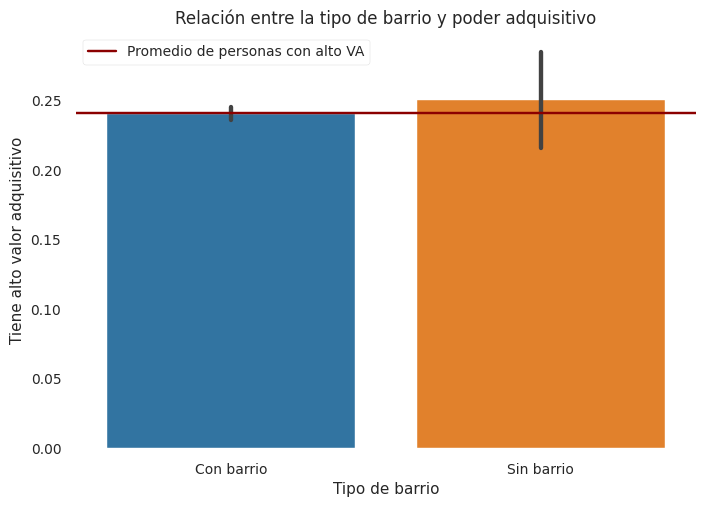

In [150]:
#Real devs dont use for


df_tiene_barrio = df[['barrio', 'tiene_alto_valor_adquisitivo']].copy()
df_tiene_barrio['barrio'] = df['barrio'].notnull().apply(lambda x: 'Con barrio' if x else 'Sin barrio')

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_barrio,
    x='barrio',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de barrio")
plt.title('Relación entre la tipo de barrio y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

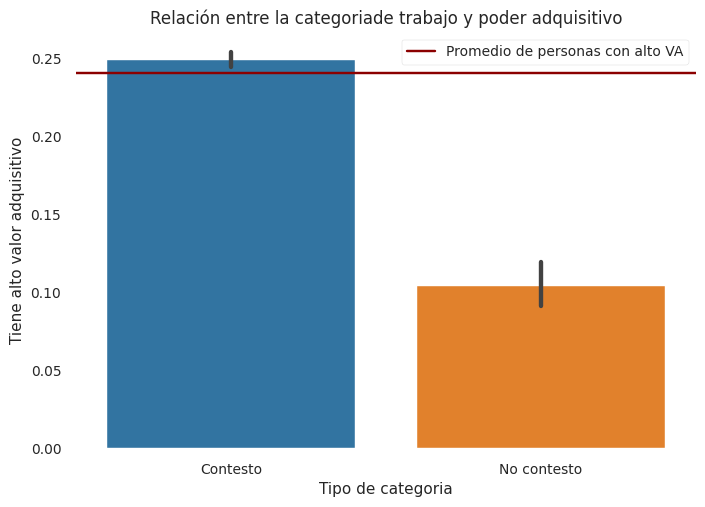

In [152]:
df_tiene_categoria_de_trabajo = df[['categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_tiene_categoria_de_trabajo['categoria_de_trabajo'] = df['categoria_de_trabajo'].notnull().apply(lambda x: 'Contesto' if x else 'No contesto')

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_categoria_de_trabajo,
    x='categoria_de_trabajo',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de categoria")
plt.title('Relación entre la categoriade trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

In [154]:
df_tiene_categoria_de_trabajo['categoria_de_trabajo'].value_counts(normalize=True)

Contesto       0.943614
No contesto    0.056386
Name: categoria_de_trabajo, dtype: float64

In [155]:
df_tiene_categoria_de_trabajo['categoria_de_trabajo'].value_counts()

Contesto       30725
No contesto     1836
Name: categoria_de_trabajo, dtype: int64